In [97]:
import networkx as nx
from collections import Counter
import numpy as np 
import matplotlib.pyplot as plt

In [98]:
# Part 1
DG = nx.DiGraph()

with open("global-cities.dat", 'r') as file:
    for line in file:
        line = line.strip()
        parts = line.split('|')
        airport = parts[0].strip()
        node_id = int(parts[1].strip())
        city = parts[2].strip()
        DG.add_node(node_id, **{"airport": airport, "city": city})

# edges=[]
with open('global-net.dat', 'r') as file: 
    for line in file: 
        line = line.strip()
        parts = line.split()
        src, target = int(parts[0].strip()), int(parts[1].strip())
        DG.add_edge(src, target)
        # edges.append((src,target))

UG = DG.to_undirected()

print("Number of DG nodes: ", DG.number_of_nodes())
print("Number of DG edges: ", DG.number_of_edges())
print("Number of UG nodes: ", UG.number_of_nodes())
print("Number of UG edges: ", UG.number_of_edges())


# Check for correctness
# ug_edges_set = {frozenset((u, v)) for u, v in UG.edges()}
# calculated_edges_set = {frozenset((src, target)) for src, target in edges}
# assert ug_edges_set == calculated_edges_set, "Mismatch! between UG and frozenset!"
# len(ug_edges_set)  == len(calculated_edges_set)"



Number of DG nodes:  3883
Number of DG edges:  28284
Number of UG nodes:  3883
Number of UG edges:  14142


In [179]:
# Part 2
connected_components = list(nx.connected_components(UG))
cc_lengths = [len(c) for c in sorted(connected_components, key=len, reverse=True)]
num_connected_components = len(connected_components)
largest_cc = max(connected_components, key=len)
largest_subgraph = UG.subgraph(largest_cc)

print("Number of connected components: ", num_connected_components)
print("# Nodes of largest component: ", largest_subgraph.number_of_nodes())
print("# Edges of largest component: ", largest_subgraph.number_of_edges())
# print(cc_lengths) # Shows that 266 connected components = 1 largest_cc + 265 isolated nodes  

# Part 3
# Sort by second argument in (node, degree) tuple
node_degree = sorted(largest_subgraph.degree, key=lambda tuples: tuples[1], reverse=True)
ids = [id for (id,_) in node_degree[:10]]

# Sort by lambda function for node degree
sorted_nodes = sorted(largest_subgraph.nodes(), key= lambda node: largest_subgraph.degree[node], reverse=True)
# Attribute names of top 10 nodes by degree
attr_names = [(largest_subgraph.nodes[n]['airport'], largest_subgraph.nodes[n]['city']) for n in ids]

print("Top 10 node ids by degree: ", ids)
print("Top 10 node ids by degree: ", sorted_nodes[:10])
print("Top 10 tuples by degree: " , node_degree[:10])
print("Attribute names:", attr_names)

Number of connected components:  266
# Nodes of largest component:  3618
# Edges of largest component:  14142
Top 10 node ids by degree:  [2343, 1775, 962, 119, 2020, 548, 2229, 179, 732, 1205]
Top 10 node ids by degree:  [2343, 1775, 962, 119, 2020, 548, 2229, 179, 732, 1205]
Top 10 tuples by degree:  [(2343, 250), (1775, 242), (962, 237), (119, 192), (2020, 186), (548, 184), (2229, 179), (179, 172), (732, 147), (1205, 144)]
Attribute names: [('PAR', 'Paris'), ('LON', 'London (GB)'), ('FRA', 'Frankfurt'), ('AMS', 'Amsterdam'), ('MOW', 'Moscow'), ('CHI', 'Chicago'), ('NYC', 'New York'), ('ATL', 'Atlanta'), ('DFW', 'Dallas/Fort Worth'), ('HOU', 'Houston')]


y-value (min, max):  0.0002575328354365182 0.25907803244913724
x-value (min, max):  1 250


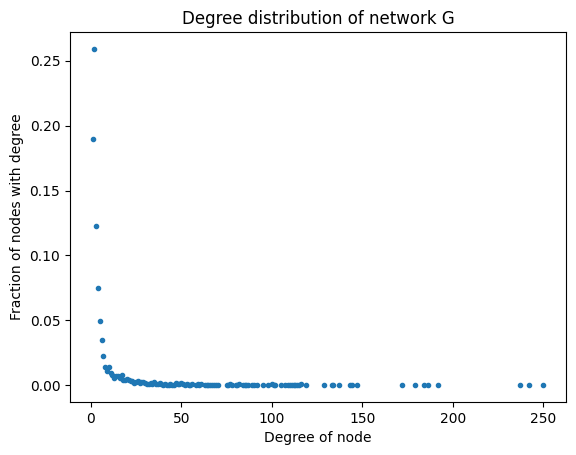

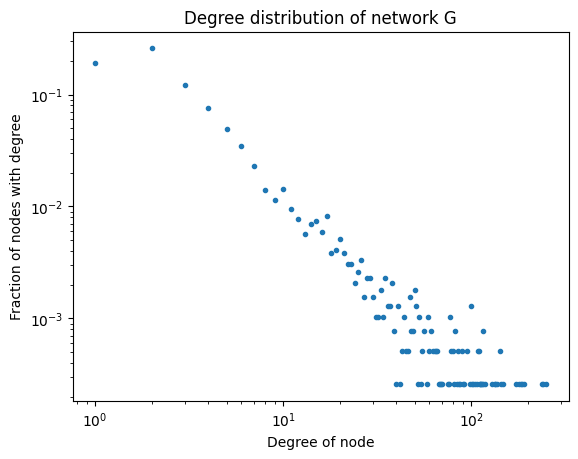

In [123]:
# Part 4
degree_sequence = [d for (_,d) in largest_subgraph.degree()] # All node degrees in G
freq_counter = Counter(degree_sequence) # (deg, freq) for each degree 
degree_nonzero = sorted(freq_counter.keys()) # filter out degrees with nonzero freq
frac = np.array([ freq_counter[d] / UG.number_of_nodes() for d in degree_nonzero])

print("y-value (min, max): ", min(frac), max(frac))
print("x-value (min, max): ", min(degree_nonzero), max(degree_nonzero))

""" # Avoid nested loops! 
# Count nodes by degree: for each x-val (degree), add 1 to y-val if degree == d for (_, d) in node_degree  
for i in range(len(degree_seq_nonzero)):
    for (_,d) in node_degree:
        if d == degree_seq_nonzero[i]:
            frac[i] += 1      
frac = frac / UG.number_of_nodes() """

plt.plot(degree_nonzero, frac, 'o', markersize=3)
plt.title('Degree distribution of network G')
plt.xlabel('Degree of node')
plt.ylabel('Fraction of nodes with degree')
plt.show()


plt.loglog(degree_nonzero, frac, 'o', markersize=3)
plt.title('Degree distribution of network G')
plt.xlabel('Degree of node')
plt.ylabel('Fraction of nodes with degree')
plt.show()


In [ ]:
# Part 5
diameter = nx.diameter(largest_subgraph)
print("Diameter of G: ", diameter)

Diameter of G:  17


In [ ]:
# Part 5
# Nodes with degree 1 in G
nodes = [n for (n, d) in largest_subgraph.degree() if d == 1]

In [ ]:
# Find longest shortest path between 2 leaves with diameter as length
longest_path = None 
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        src = nodes[i]
        tgt = nodes[j]
        if nx.shortest_path_length(largest_subgraph, source=src, target=tgt) == diameter:
            longest_path = nx.shortest_path(largest_subgraph, src, tgt)
            break

path_nodes = [(largest_subgraph.nodes[n]['airport'], largest_subgraph.nodes[n]['city']) for n in longest_path]
print("Path nodes: ", path_nodes) .items.items.

Path nodes:  [('BZZ', 'Brize Norton'), ('ASI', 'Georgetown (XV)'), ('MPN', 'Mount Pleasant'), ('PUQ', 'Punta Arenas'), ('CCP', 'Concepcion (CL)'), ('NQN', 'Neuquen'), ('BUE', 'Buenos Aires'), ('AKL', 'Auckland'), ('BNE', 'Brisbane'), ('POM', 'Port Moresby'), ('LAE', 'Lae'), ('IDN', 'Indagen'), ('KGB', 'Konge'), ('KBM', 'Kabwum'), ('SWG', 'Satwag'), ('DER', 'Derim'), ('KYX', 'Yalumet'), ('WSU', 'Wasu')]


In [172]:
# Check BZZ to WSU 
bzz = next((n for (n, data) in largest_subgraph.nodes(data=True) if data.get('airport')=='BZZ'), None)
bsu = next((n for (n, data) in largest_subgraph.nodes(data=True) if data.get('airport')=='WSU'), None)

check_path = nx.shortest_path(largest_subgraph, source=bzz, target=bsu)
stops = [(UG.nodes[n]['airport'], UG.nodes[n]['city']) for n in check_path]
check_path_length = nx.shortest_path_length(largest_subgraph, source=bzz, target=bsu)

print(stops)
print(check_path_length)

[('BZZ', 'Brize Norton'), ('ASI', 'Georgetown (XV)'), ('MPN', 'Mount Pleasant'), ('PUQ', 'Punta Arenas'), ('CCP', 'Concepcion (CL)'), ('NQN', 'Neuquen'), ('BUE', 'Buenos Aires'), ('AKL', 'Auckland'), ('BNE', 'Brisbane'), ('POM', 'Port Moresby'), ('LAE', 'Lae'), ('IDN', 'Indagen'), ('KGB', 'Konge'), ('KBM', 'Kabwum'), ('SWG', 'Satwag'), ('DER', 'Derim'), ('KYX', 'Yalumet'), ('WSU', 'Wasu')]
17


In [173]:
# Part 6
cbr = next((n for (n,data) in UG.nodes(data=True) if data.get('airport') == 'CBR'), None)
cpt = next((n for (n,data) in UG.nodes(data=True) if data.get('airport') == 'CPT'), None)

shortest_path_length = nx.shortest_path_length(UG, source=cbr, target=cpt)
shortest_path = nx.shortest_path(UG, source=cbr, target=cpt)
route_nodes = [(UG.nodes[n]['airport'], UG.nodes[n]['city']) for n in shortest_path]

print(route_nodes)
print(shortest_path)
print(shortest_path_length)


[('CBR', 'Canberra'), ('MEL', 'Melbourne (AU)'), ('MRU', 'Mauritius'), ('CPT', 'Cape Town')]
[501, 1908, 2043, 635]
3


In [175]:
# Part 7
betweeness = nx.betweenness_centrality(largest_subgraph)


In [177]:
most_central = sorted(betweeness.items(), key=lambda x: x[-1], reverse=True)
info_central = [(val, UG.nodes[n]['airport'], UG.nodes[n]['city']) for n,val in most_central[:10]]
print(info_central)

[(0.09342038060218949, 'PAR', 'Paris'), (0.08498898419090709, 'LON', 'London (GB)'), (0.08152332552856371, 'ANC', 'Anchorage'), (0.0753624044622871, 'SIN', 'Singapore'), (0.06928349085871564, 'NYC', 'New York'), (0.06624987936182283, 'LAX', 'Los Angeles (US)'), (0.06557771120844091, 'FRA', 'Frankfurt'), (0.06432333262687207, 'POM', 'Port Moresby'), (0.06024259549977447, 'TYO', 'Tokyo'), (0.052378568564902944, 'SEA', 'Seattle')]
